# Dauer des Entscheidungsprozesses
# How long does it take to get a message if the inquiry gets requected? How long if it is certified?

In der nachfolgenden Analyse soll ein genauerer Blick auf die Dauer des Entscheidungsprozesses geworfen werden.

Folgende Spalten werden für die Analyse der Dauer benötigt:
- case_status
- case_received_date
- decision_date

Anschließend soll ein Bezug zum prevailing wage der Bewerber hergestellt werden, mit den Spalten:
- prevailing_wage_amount_9089
- prevailing_wage_unit_of_pay_9089

In [1]:
import cleanup
import pandas as pd
import modules
import matplotlib.pyplot as plt
plt.style.use('../own_style.mplstyle')
from scipy.stats import linregress

In [2]:
# cleanup.generate_cleaned_df()

In [3]:
col_list = ["case_status", "case_received_date", "decision_date", "prevailing_wage_amount_9089", "prevailing_wage_unit_of_pay_9089"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)



C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
visas_df.head()

,case_received_date,decision_date,case_status,prevailing_wage_amount_9089,prevailing_wage_unit_of_pay_9089
0,NaN,2012-02-01,Certified,75629.00,yr
1,NaN,2011-12-21,Denied,37024.00,yr
2,NaN,2011-12-01,Certified,47923.00,yr
3,NaN,2011-12-01,Certified,10.97,hr
4,NaN,2012-01-26,Certified,94890.00,yr


Wie viele Daten sind in den verschiedenen Spalten vorhanden? Dafür nutzen wir die Funktion `print_count_of_values_relation` aus der modules.py.

case_received_date
239091/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows

decision_date
374362/374362 100%
Filled: |██████████████████████████████████████████████████| 100.0% Rows

case_status
374362/374362 100%
Filled: |██████████████████████████████████████████████████| 100.0% Rows

prevailing_wage_amount_9089
372146/374362 99%
Filled: |█████████████████████████████████████████████████-| 99.4% Rows

prevailing_wage_unit_of_pay_9089
372790/374362 100%
Filled: |█████████████████████████████████████████████████-| 99.6% Rows



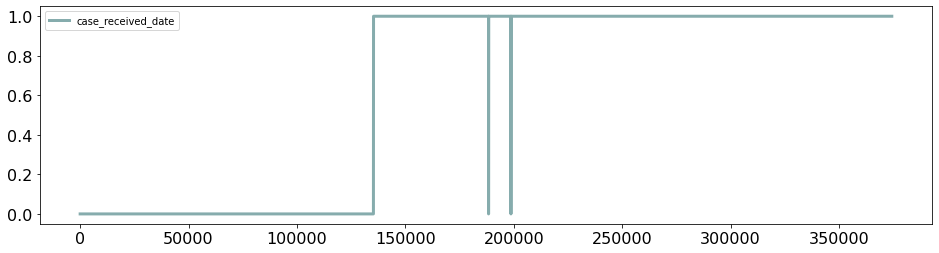

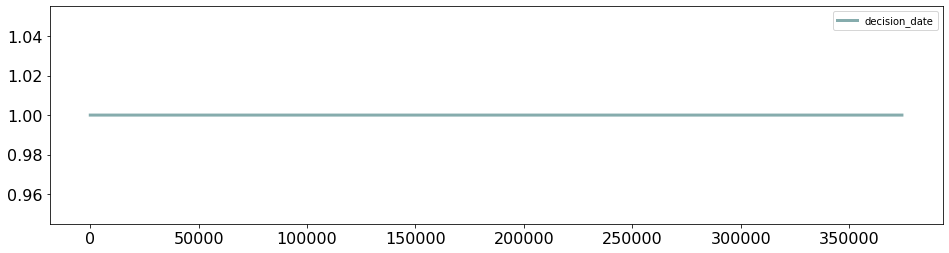

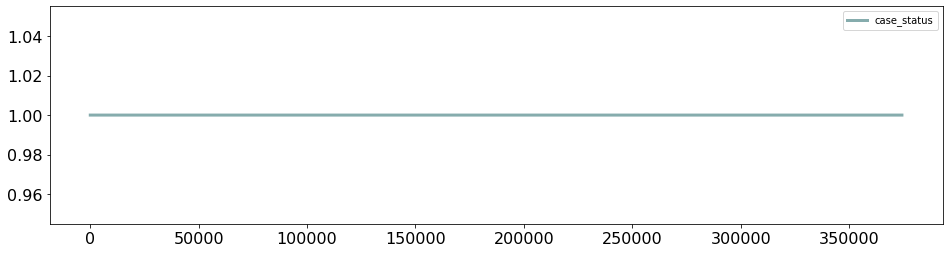

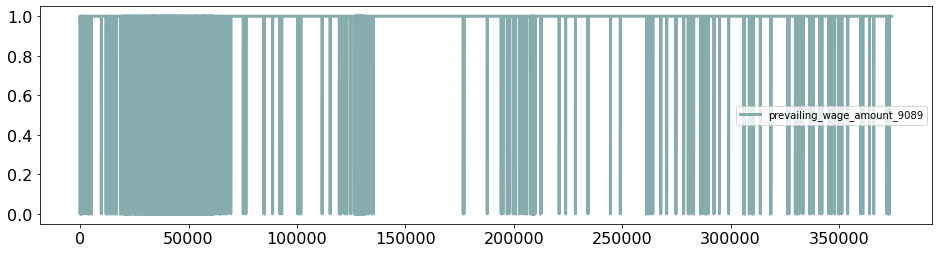

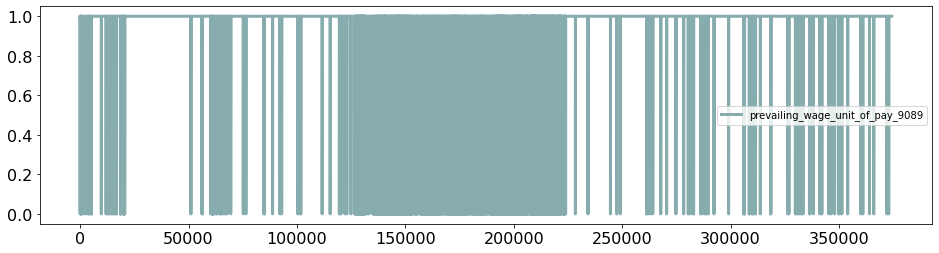

In [5]:
modules.print_count_of_values_relation(visas_df, True, True)

Im Großen und Ganzen liegen in den Spalten nahezu vollständige Daten vor. Einzig die Spalte `case_received_date` ist nur zu 64% befüllt.
Da diese 64% jedoch 239.091 Datensätze ausmachen, sind genügend Datensätze für eine Analyse vorhanden.

## Es soll kurz noch auf die einzelnen Spalten eingegangen werden.

In [6]:
visas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 5 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   case_received_date                239091 non-null  object 
 1   decision_date                     374362 non-null  object 
 2   case_status                       374362 non-null  object 
 3   prevailing_wage_amount_9089       372146 non-null  float64
 4   prevailing_wage_unit_of_pay_9089  372790 non-null  object 
dtypes: float64(1), object(4)
memory usage: 14.3+ MB


### case_status

<AxesSubplot:ylabel='case_status'>

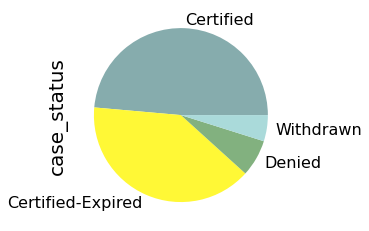

In [7]:
visas_df["case_status"].value_counts().plot(kind="pie")

Bei der Spalte 'case_status' handelt es sich um eine Kategoriale Variable, welche bereits sehr gut bereinigt vorliegt.

### case_received_date und decision_date

In [8]:
visas_df['case_received_date'].value_counts()

2014-06-30    767
2015-09-30    696
2015-06-30    695
2015-06-29    691
2016-06-29    670
             ... 
2009-03-06      1
2011-12-30      1
2012-02-23      1
2008-11-18      1
2016-11-19      1
Name: case_received_date, Length: 2180, dtype: int64

In [9]:
visas_df['decision_date'].value_counts()

2015-11-19    1981
2015-11-20    1165
2015-09-18    1113
2015-12-07    1088
2015-08-28    1064
              ... 
2013-10-26       1
2016-06-18       1
2015-11-01       1
2014-03-09       1
2014-05-04       1
Name: decision_date, Length: 1450, dtype: int64

Der Datentyp der Datumsspalten ist noch Object. Diesen wandeln wir nun bei beiden Spalten in Datatime um.

In [10]:
visas_df['case_received_date'] = pd.to_datetime(visas_df['case_received_date'])

In [11]:
visas_df['decision_date'] = pd.to_datetime(visas_df["decision_date"])

In [12]:
visas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 5 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   case_received_date                239091 non-null  datetime64[ns]
 1   decision_date                     374362 non-null  datetime64[ns]
 2   case_status                       374362 non-null  object        
 3   prevailing_wage_amount_9089       372146 non-null  float64       
 4   prevailing_wage_unit_of_pay_9089  372790 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 14.3+ MB


Nun wird noch ein kurzer Blick auf die Plausibilität der in dem Datumsspalten enthaltenen Werte geworfen.


In [13]:
visas_df['case_received_date'].nsmallest(10)


135468   2006-06-21
244931   2007-07-06
252985   2007-07-20
371796   2007-08-17
135482   2007-09-04
218244   2007-10-19
329959   2007-11-15
135489   2007-12-07
250909   2007-12-07
239942   2007-12-26
Name: case_received_date, dtype: datetime64[ns]

In [14]:
visas_df['case_received_date'].nlargest(10)

374358   2016-12-30
374359   2016-12-30
374360   2016-12-30
374361   2016-12-30
374152   2016-12-29
374153   2016-12-29
374357   2016-12-29
373698   2016-12-28
373742   2016-12-28
373743   2016-12-28
Name: case_received_date, dtype: datetime64[ns]

In [15]:
visas_df['decision_date'].nsmallest(10)

111    2011-10-03
756    2011-10-03
898    2011-10-03
980    2011-10-03
1010   2011-10-03
1011   2011-10-03
1226   2011-10-03
1439   2011-10-03
1489   2011-10-03
1602   2011-10-03
Name: decision_date, dtype: datetime64[ns]

In [16]:
visas_df['decision_date'].nlargest(10)

356130   2016-12-30
357657   2016-12-30
374102   2016-12-30
374114   2016-12-30
374134   2016-12-30
374154   2016-12-30
374155   2016-12-30
374156   2016-12-30
374157   2016-12-30
374158   2016-12-30
Name: decision_date, dtype: datetime64[ns]

Die Werte sehen plausibel aus.

# Die Dauer der Entscheidungsfindung

Auf der Seite des auswärtigen Amtes wird zur Dauer des Visa Prozesses folgendendes aufgeführt:
"Applications for visas entitling the holder to a longer stay or to take up gainful employment may take several months to process."
https://www.auswaertiges-amt.de/en/einreiseundaufenthalt/visabestimmungen-node#content_5

Um die Dauer der Entscheidungsfindung zu ermitteln subtrahieren wir vom Tag der Entscheidung, den Tag des Antrageingangs.

In [17]:
visas_df['duration_of_decision'] = visas_df['decision_date']-visas_df['case_received_date']

In [18]:
visas_df[['decision_date','case_received_date','duration_of_decision']].sample(20)

,decision_date,case_received_date,duration_of_decision
97351,2014-02-07,NaT,NaT
344603,2016-09-15,2016-06-03,104 days
307334,2016-06-02,2016-02-03,120 days
284383,2016-03-30,2015-10-28,154 days
342406,2016-09-09,2016-06-28,73 days
33853,2013-04-01,NaT,NaT
303087,2016-05-20,2016-01-27,114 days
197753,2015-09-28,2015-03-03,209 days
167248,2015-04-06,2014-07-01,279 days
147233,2015-08-10,2014-04-07,490 days


In der neu berechneten Splate `duration_of_decision` befinden sich nun mehrere NaT Werte.
Diese treten immer auf, sobald bei `case_received_date` zum Zeitpunkt der Berechnung kein Wert vorlag.
Alle Zeilen mit NaT Werten bei Spalte 'duration_of_decision` werden nun für die  nachfolgenden Analyse vom Datensatz entfernt.

In [19]:
visas_df.dropna(subset = ["duration_of_decision"], inplace=True)

In [20]:
visas_df[['decision_date','case_received_date','duration_of_decision']].sample(20)

,decision_date,case_received_date,duration_of_decision
366630,2016-11-30,2016-09-06,85 days
308651,2016-06-07,2016-02-04,124 days
267874,2016-02-16,2015-09-25,144 days
349123,2016-09-30,2016-02-18,225 days
223356,2015-08-28,2015-02-03,206 days
151643,2015-07-14,2014-03-11,490 days
352313,2016-10-12,2016-07-29,75 days
187555,2015-06-10,2014-12-02,190 days
236597,2015-11-19,2015-05-19,184 days
303115,2016-05-20,2015-10-22,211 days


In [21]:
visas_df["duration_of_decision"].size

239091

Um Berechnungen zu vereinfachen, werden wir die in Spalte `duration_of_decision` enthaltenen Werte zu int Werte umwandeln.

In [22]:
visas_df['duration_of_decision'] = visas_df['duration_of_decision'].dt.days

In [23]:
visas_df['duration_of_decision']

135269    556
135270    591
135271    323
135272    559
135273    591
         ... 
374357      1
374358      0
374359      0
374360      0
374361      0
Name: duration_of_decision, Length: 239091, dtype: int64

In [24]:
visas_df.groupby('case_status')['duration_of_decision'].mean().sort_values()

case_status
Withdrawn            105.814246
Certified            172.393605
Certified-Expired    222.298922
Denied               517.754714
Name: duration_of_decision, dtype: float64

In [25]:

visas_df.groupby('case_status')['duration_of_decision'].describe()

,count,mean,std,min,25%,50%,75%,max
case_status,,,,,,,,
Certified,120969.0,172.393605,150.296833,3.0,87.0,125.0,202.0,3082.0
Certified-Expired,95570.0,222.298922,136.983325,79.0,150.0,173.0,198.0,2852.0
Denied,12781.0,517.754714,505.650797,0.0,201.0,399.0,631.0,3413.0
Withdrawn,9771.0,105.814246,168.466313,0.0,1.0,29.0,146.0,3092.0


Es ist festzuhalten, dass starke Unterschiede in der Bearbeitungsdauer vorliegen je nachdem, ob der Antrag zurückgezogen, stattgegeben, stattgegeben und verfallen oder abgelehnt wurde.
So bedarfen zurückgezogene Anträge die kürzeste Bearbeitungsdauer. Dies ist insofern verständlich, dass der Rückzug eines Antrages immer vor der eigentlichen Entscheidung über den Antrag erfolgen müsste.

Ebenso müsste der Status stattgegeben und verfallen nach dem Status stattgegeben eintreten.

Mit Abstand am längsten dauert es bis zum Ablehnnung des Antrages.

Wie hat sich die Bearbeitungsdauer über die Zeit entwicklelt?
Klappt die Zertifizierung mittlerweile schneller?

Dafür bilden wir je Monat einen Medianwert. Ebenfalls wird die Pivot-Funktion von Pandas genutzt um für jedes Entscheidung-Jahr eine eigene Spalte in einem DateFarme zu hinterlegen. 

In [70]:
visas_df

,case_received_date,decision_date,case_status,prevailing_wage_amount_9089,prevailing_wage_unit_of_pay_9089,duration_of_decision
135269,2013-11-19,2015-05-29,Certified,83366.0,yr,556
135270,2013-11-12,2015-06-26,Denied,16973.0,yr,591
135271,2013-11-27,2014-10-16,Denied,49982.0,yr,323
135272,2013-11-13,2015-05-26,Certified,43514.0,yr,559
135273,2013-11-12,2015-06-26,Denied,16973.0,yr,591
...,...,...,...,...,...,...
374357,2016-12-29,2016-12-30,Withdrawn,28330.0,yr,1
374358,2016-12-30,2016-12-30,Withdrawn,107744.0,yr,0
374359,2016-12-30,2016-12-30,Withdrawn,79082.0,yr,0
374360,2016-12-30,2016-12-30,Withdrawn,37981.0,yr,0


In [144]:
duration_per_month_and_year_df = pd.pivot_table(visas_df, index=visas_df['decision_date'].dt.month, columns=visas_df['decision_date'].dt.year,
                    values='duration_of_decision', aggfunc='mean')
duration_per_month_and_year_df
duration_per_month_and_year_df = duration_per_month_and_year_df.rename_axis(None)

No handles with labels found to put in legend.
<ipython-input-155-2e93e6444dba>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


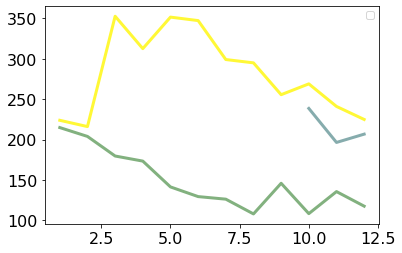

<Figure size 720x360 with 0 Axes>

In [155]:
fig, axes = plt.subplots()
fig = plt.figure(figsize=(10,5))
axes.plot(duration_per_month_and_year_df)
fig.suptitle('Dauer der Entscheidungsfindung je Jahr der Entscheidung', fontsize=20)
#plt.xlabel('Jahr der Entscheidung', fontsize=18)
#plt.ylabel('Dauer der Entscheidung in Stunden', fontsize=16)
axes.legend(loc="upper right")
fig.show()

In [146]:
duration_per_month_and_year_df

decision_date,2014,2015,2016
1,NaN,223.875651,214.869200
2,NaN,216.101837,203.904392
3,NaN,352.744863,179.644342
4,NaN,312.642731,173.351460
5,NaN,351.658894,141.371004
6,NaN,347.353954,129.391906
7,NaN,299.127910,126.203789
8,NaN,295.026330,107.940037
9,NaN,255.588960,145.871763
10,238.588876,268.998505,108.282989


In [126]:
duration_per_month_and_year_df_1 = duration_per_month_and_year_df.reset_index()

In [127]:
duration_per_month_and_year_df_1 = duration_per_month_and_year_df_1.reset_index(drop=True)

In [135]:
duration_per_month_and_year_df_1.droplevel(0)


ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [130]:
duration_per_month_and_year_df_1.columns.name = None

In [122]:
duration_per_month_and_year_df_1

,2014,2015,2016
decision_date,,,
1,NaN,223.875651,214.869200
2,NaN,216.101837,203.904392
3,NaN,352.744863,179.644342
4,NaN,312.642731,173.351460
5,NaN,351.658894,141.371004
6,NaN,347.353954,129.391906
7,NaN,299.127910,126.203789
8,NaN,295.026330,107.940037
9,NaN,255.588960,145.871763


In [132]:
duration_per_month_and_year_df_1 = duration_per_month_and_year_df_1.set_index("decision_date")

In [121]:
duration_per_month_and_year_df_1.droplevel(0)

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

No handles with labels found to put in legend.


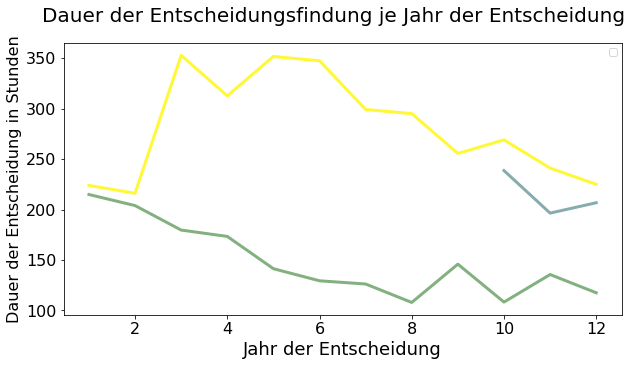

In [117]:
fig = plt.figure(figsize=(10,5))
plt.plot(duration_per_month_and_year_df_1)
fig.suptitle('Dauer der Entscheidungsfindung je Jahr der Entscheidung', fontsize=20)
plt.xlabel('Jahr der Entscheidung', fontsize=18)
plt.ylabel('Dauer der Entscheidung in Stunden', fontsize=16)
plt.legend(loc="upper right")
plt.show()


In [42]:
duration_per_month_and_year_df_1.rename(index={0: "index"})

decision_date,decision_date,2014,2015,2016
index,1,NaN,223.875651,214.869200
1,2,NaN,216.101837,203.904392
2,3,NaN,352.744863,179.644342
3,4,NaN,312.642731,173.351460
4,5,NaN,351.658894,141.371004
5,6,NaN,347.353954,129.391906
6,7,NaN,299.127910,126.203789
7,8,NaN,295.026330,107.940037
8,9,NaN,255.588960,145.871763
9,10,238.588876,268.998505,108.282989


In [35]:
del duration_per_month_and_year_df_1["decision_date"]

In [47]:
duration_per_month_and_year_df

NameError: name 'duration_per_month_and_year_df_' is not defined

In [31]:
#plt.figure(figsize=(15, 10))
#plt.bar(visas_df["decision_date"],visas_df["duration_of_decision"])


#plt.show()

In [32]:
visas_df["decision_date_month"] = visas_df["decision_date"].dt.strftime('%Y-%m')
visas_df["decision_date_month"]

135269    2015-05
135270    2015-06
135271    2014-10
135272    2015-05
135273    2015-06
           ...   
374357    2016-12
374358    2016-12
374359    2016-12
374360    2016-12
374361    2016-12
Name: decision_date_month, Length: 239091, dtype: object

<AxesSubplot:xlabel='decision_date_month'>

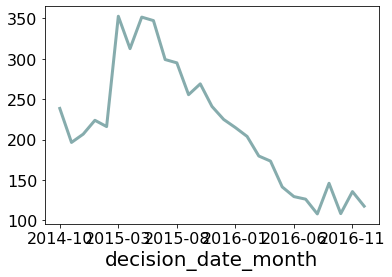

In [33]:

visas_df.groupby('decision_date_month')['duration_of_decision'].mean().plot()

In [34]:
visas_df.groupby('decision_date_month')['duration_of_decision'].mean()

decision_date_month
2014-10    238.588876
2014-11    196.461180
2014-12    206.733945
2015-01    223.875651
2015-02    216.101837
2015-03    352.744863
2015-04    312.642731
2015-05    351.658894
2015-06    347.353954
2015-07    299.127910
2015-08    295.026330
2015-09    255.588960
2015-10    268.998505
2015-11    241.050678
2015-12    224.919840
2016-01    214.869200
2016-02    203.904392
2016-03    179.644342
2016-04    173.351460
2016-05    141.371004
2016-06    129.391906
2016-07    126.203789
2016-08    107.940037
2016-09    145.871763
2016-10    108.282989
2016-11    135.589623
2016-12    117.536989
Name: duration_of_decision, dtype: float64

In [35]:
visas_df["decision_date"].dt.year.value_counts()

2016    124230
2015     96703
2014     18158
Name: decision_date, dtype: int64

In [36]:
visas_df = visas_df[visas_df["case_received_date"].dt.year > 2013]

In [37]:


pv = pd.pivot_table(visas_df, index=visas_df['decision_date'].dt.month, columns=visas_df['decision_date'].dt.year,
                    values='duration_of_decision', aggfunc='mean')


pv

decision_date,2014,2015,2016
decision_date,,,
1,NaN,152.171551,206.696927
2,NaN,147.657466,193.749798
3,NaN,152.671717,175.511448
4,NaN,201.629970,160.491299
5,NaN,172.861204,136.681006
6,NaN,261.771011,120.072874
7,NaN,275.342234,109.381375
8,NaN,268.620880,102.342849
9,NaN,238.638975,105.194944


<AxesSubplot:xlabel='decision_date'>

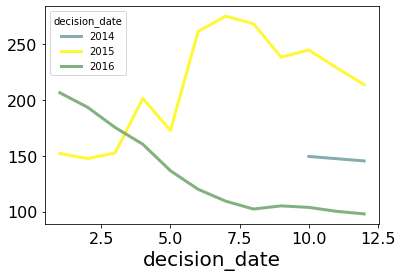

In [38]:
pv.plot()

## scatterplot


In [39]:
visas_df.head()

,case_received_date,decision_date,case_status,prevailing_wage_amount_9089,prevailing_wage_unit_of_pay_9089,duration_of_decision,decision_date_month
135275,2014-07-02,2014-12-01,Certified-Expired,55682.0,yr,152,2014-12
135280,2014-01-02,2015-06-12,Certified,46301.0,yr,526,2015-06
135287,2014-06-30,2015-09-11,Certified,98675.0,yr,438,2015-09
135294,2014-01-13,2015-06-23,Certified,46093.0,yr,526,2015-06
135296,2014-10-19,2015-03-10,Certified-Expired,50024.0,yr,142,2015-03


In [40]:
visas_df["decision_date"].value_counts()

2015-11-19    1972
2015-11-20    1151
2015-09-18    1103
2015-12-07    1082
2016-03-08    1062
              ... 
2016-12-25       1
2015-06-07       1
2014-11-30       1
2016-08-21       1
2016-05-30       1
Name: decision_date, Length: 704, dtype: int64

In [41]:
visas_df.groupby('case_status')['duration_of_decision'].describe()

,count,mean,std,min,25%,50%,75%,max
case_status,,,,,,,,
Certified,116333.0,152.661180,98.224288,3.0,86.0,120.0,197.0,1002.0
Certified-Expired,87936.0,190.525553,74.777630,79.0,149.0,168.0,190.0,756.0
Denied,8854.0,276.555116,179.585818,0.0,144.0,234.0,428.0,1044.0
Withdrawn,9275.0,78.252507,113.515255,0.0,1.0,22.0,120.0,736.0


In [42]:

visas_df["decision_date"].dt.year.value_counts()

2016    123091
2015     83734
2014     15573
Name: decision_date, dtype: int64

In [43]:

visas_df["prevailing_wage_unit_of_pay_9089"].value_counts()



yr     216769
hr       4460
wk         90
mth        43
bi         11
Name: prevailing_wage_unit_of_pay_9089, dtype: int64

In [44]:


visas_df = visas_df[visas_df["prevailing_wage_unit_of_pay_9089"] == 'yr']

In [45]:

visas_df = visas_df[visas_df.case_status != 'Withdrawn']
visas_df = visas_df[visas_df.case_status != 'Certified-Expired']

In [46]:
visas_df.sample(10)

,case_received_date,decision_date,case_status,prevailing_wage_amount_9089,prevailing_wage_unit_of_pay_9089,duration_of_decision,decision_date_month
354645,2016-08-25,2016-10-19,Certified,101483.0,yr,55,2016-10
356927,2016-08-16,2016-10-26,Certified,105810.0,yr,71,2016-10
358525,2016-08-24,2016-10-31,Certified,99195.0,yr,68,2016-10
324654,2016-04-15,2016-07-19,Certified,82618.0,yr,95,2016-07
336607,2016-05-05,2016-08-23,Certified,142376.0,yr,110,2016-08
206253,2015-02-13,2015-09-11,Certified,64542.0,yr,210,2015-09
365351,2016-09-02,2016-11-23,Certified,84178.0,yr,82,2016-11
196241,2014-12-15,2015-07-24,Certified,76378.0,yr,221,2015-07
355340,2016-08-03,2016-10-21,Certified,151757.0,yr,79,2016-10
145628,2014-12-01,2015-06-09,Certified,102606.0,yr,190,2015-06


In [47]:
visas_df.prevailing_wage_amount_9089 = visas_df.prevailing_wage_amount_9089.astype(int)

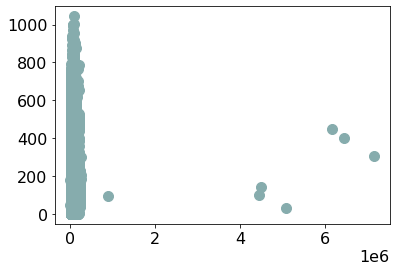

In [48]:

import pandas as pd
import matplotlib.pyplot as plt

x = visas_df.prevailing_wage_amount_9089
y = visas_df.duration_of_decision
plt.scatter(x, y)
plt.show()  # or plt.savefig("name.png")

In [49]:

visas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121437 entries, 135280 to 374353
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   case_received_date                121437 non-null  datetime64[ns]
 1   decision_date                     121437 non-null  datetime64[ns]
 2   case_status                       121437 non-null  object        
 3   prevailing_wage_amount_9089       121437 non-null  int32         
 4   prevailing_wage_unit_of_pay_9089  121437 non-null  object        
 5   duration_of_decision              121437 non-null  int64         
 6   decision_date_month               121437 non-null  object        
dtypes: datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 6.9+ MB


In [50]:
visas_df.prevailing_wage_amount_9089.nlargest(10)


371525    7149000
305415    6431400
234182    6156800
174452    5067600
286626    4500000
328973    4438700
208973     885666
198257     252637
324539     251909
178917     251576
Name: prevailing_wage_amount_9089, dtype: int32

In [51]:
#https://nextjournal.com/schmudde/how-to-remove-outliers-in-data
visas_df = visas_df[visas_df.prevailing_wage_amount_9089.between(visas_df.prevailing_wage_amount_9089.quantile(.05), visas_df.prevailing_wage_amount_9089.quantile(.95))] # without outliers

In [52]:
visas_df["decision_year"] = visas_df["decision_date"].dt.year

In [53]:
visas_df = visas_df[visas_df["case_received_date"].dt.year > 2014]

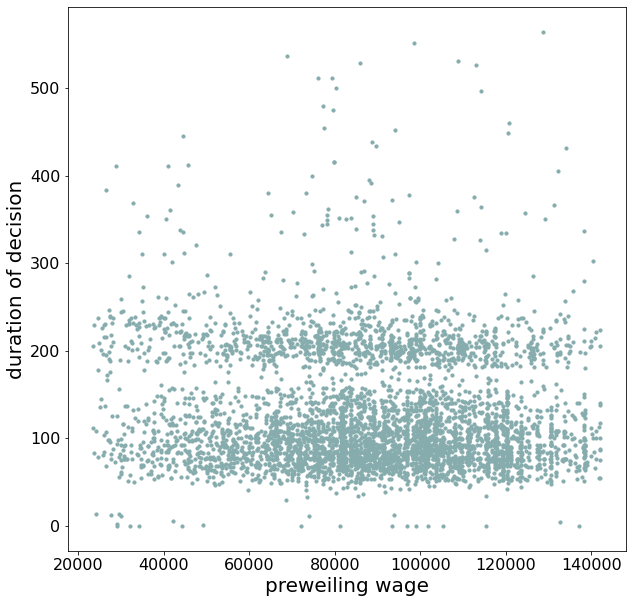

In [54]:
scatdf = visas_df.sample(5000)

import pandas as pd
import matplotlib.pyplot as plt

x = scatdf.prevailing_wage_amount_9089
y = scatdf.duration_of_decision

fig, ax = plt.subplots()
ax.set_xlabel("preweiling wage")
ax.set_ylabel("duration of decision")
plt.gcf().set_size_inches((10, 10))
plt.scatter(x, y, s=10)
ax.set_xlabel("preweiling wage")
ax.set_ylabel("duration of decision")
plt.show()  # or plt.savefig("name.png")

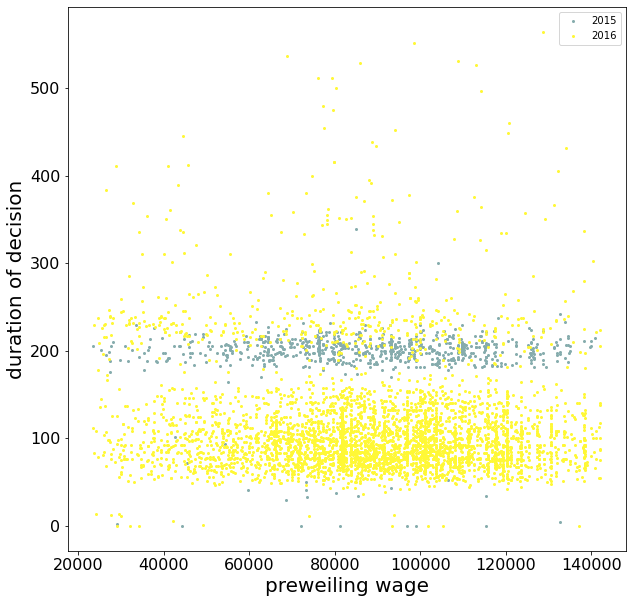

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Generate Data

labels = scatdf["decision_year"]
groups = scatdf.groupby(by="decision_year")
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=2, label=name)
ax.legend()
plt.gcf().set_size_inches((10, 10))
ax.set_xlabel("preweiling wage")
ax.set_ylabel("duration of decision")
plt.show()

In [56]:
x.size

5000

In [57]:
scatdf.head()

,case_received_date,decision_date,case_status,prevailing_wage_amount_9089,prevailing_wage_unit_of_pay_9089,duration_of_decision,decision_date_month,decision_year
368706,2016-09-26,2016-12-07,Certified,66955,yr,72,2016-12,2016
339292,2016-06-01,2016-08-30,Certified,124426,yr,90,2016-08,2016
333115,2016-05-13,2016-08-11,Certified,105102,yr,90,2016-08,2016
303162,2016-01-21,2016-05-20,Certified,102357,yr,120,2016-05,2016
346698,2016-07-08,2016-09-22,Certified,78645,yr,76,2016-09,2016


In [58]:

scatdf["decision_date"].dt.year.value_counts()

2016    4244
2015     756
Name: decision_date, dtype: int64

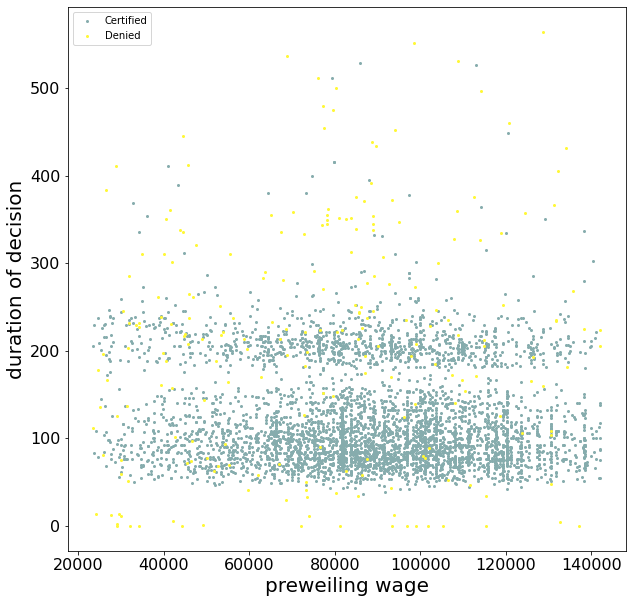

In [59]:
labels = scatdf["case_status"]
groups = scatdf.groupby(by="case_status")
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')

stats = linregress(x, y)
m = stats.slope
b = stats.intercept
# Plot
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=2, label=name)
ax.legend()
plt.gcf().set_size_inches((10, 10))
#plt.plot(x, m * x + b, color="red")
ax.set_xlabel("preweiling wage")
ax.set_ylabel("duration of decision")
plt.show()

In [60]:


col_list = ["case_status", "case_received_date", "decision_date", "prevailing_wage_amount_9089", "prevailing_wage_unit_of_pay_9089", "class_of_admission"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [61]:

visas_df = visas_df[visas_df["class_of_admission"]=="H-1B"]
visas_df['decision_date'] = pd.to_datetime(visas_df["decision_date"])

visas_df = visas_df[(visas_df["case_status"]=="Certified") | (visas_df["case_status"]=="Certified-Expired")]

In [62]:
visas_df["decision_date_year"] = visas_df["decision_date"].dt.year

In [63]:
visas_df.groupby(["decision_date_year", "case_status"])["case_status"].count()

decision_date_year  case_status      
2011                Certified             4064
                    Certified-Expired     4020
2012                Certified             5717
                    Certified-Expired     9957
2013                Certified            11344
                    Certified-Expired    15163
2014                Certified            29297
                    Certified-Expired    28009
2015                Certified            30164
                    Certified-Expired    35823
2016                Certified            58726
                    Certified-Expired    23870
Name: case_status, dtype: int64

In [64]:
visas_df


,case_received_date,decision_date,case_status,prevailing_wage_amount_9089,prevailing_wage_unit_of_pay_9089,class_of_admission,decision_date_year
2,NaN,2011-12-01,Certified,47923.00,yr,H-1B,2011
6,NaN,2011-10-07,Certified-Expired,47083.33,yr,H-1B,2011
8,NaN,2012-02-29,Certified,44824.00,yr,H-1B,2012
11,NaN,2012-01-06,Certified,46176.00,yr,H-1B,2012
12,NaN,2012-01-26,Certified,34.30,hr,H-1B,2012
...,...,...,...,...,...,...,...
374348,2016-10-28,2016-12-30,Certified,123490.00,yr,H-1B,2016
374349,2016-10-31,2016-12-30,Certified,84635.00,yr,H-1B,2016
374350,2016-10-31,2016-12-30,Certified,69098.00,yr,H-1B,2016
374352,2016-10-31,2016-12-30,Certified,112354.00,yr,H-1B,2016


<AxesSubplot:xlabel='decision_date_year,case_status'>

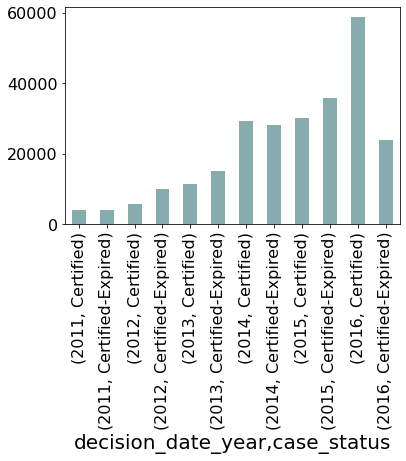

In [65]:

visas_df.groupby(["decision_date_year", "case_status"])["case_status"].count().plot(kind="bar")

In [66]:
col_list = ["case_status", "case_received_date", "decision_date", "prevailing_wage_amount_9089", "prevailing_wage_unit_of_pay_9089", "class_of_admission"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)


C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [67]:

visas_df =  cleanup.convert_case_status_to_certified_or_denied(visas_df)

In [68]:
visas_df['decision_date'] = pd.to_datetime(visas_df["decision_date"])
visas_df
visas_df["decision_date_year"] = visas_df["decision_date"].dt.year

In [69]:
tmp = pd.DataFrame()
tmp = visas_df.groupby(["decision_date_year", "case_status"])["case_status"].count()

In [70]:
tmp = tmp.to_frame().unstack()

In [71]:
tmp


case_status       
case_status          Certified Denied
decision_date_year                   
2011                      9474   1128
2012                     19116   2838
2013                     32040   5433
2014                     69458   4423
2015                     86404   5934
2016                    114027   5893

In [72]:
tmp = tmp.reset_index()


In [73]:
tmp= tmp.set_index("decision_date_year")

In [74]:
tmp = tmp["case_status"]

In [75]:
tmp["relation"] = tmp["Denied"]/(tmp["Certified"]+ tmp["Denied"])

In [76]:
tmp

case_status,Certified,Denied,relation
decision_date_year,,,
2011,9474,1128,0.106395
2012,19116,2838,0.129270
2013,32040,5433,0.144984
2014,69458,4423,0.059867
2015,86404,5934,0.064264
2016,114027,5893,0.049141


<AxesSubplot:xlabel='decision_date_year'>

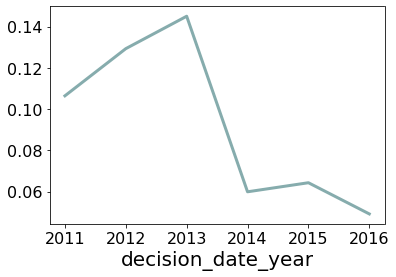

In [77]:
tmp["relation"].plot()


FAANG: http://conormclaughlin.net/2019/04/h1-b-visa-analysis/
https://www.statista.com/chart/22079/denial-rate-for-h1b-visa-petitions/